In [2]:
##importing Basic libraries
import pandas as pd
import pickle
from pandas import DataFrame, Series
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
import numpy as np
#import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model, naive_bayes
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
import bokeh as bk
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import pyplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error,r2_score
import plotly
import chart_studio.plotly as py
from chart_studio.plotly import plot, iplot 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import pybaseball as pyb
from sklearn.linear_model import ElasticNet
from pybaseball import statcast
from pybaseball import statcast_pitcher
from pybaseball import statcast_batter
from pybaseball import statcast_pitcher_exitvelo_barrels
from pybaseball import statcast_batter_exitvelo_barrels
from pybaseball import statcast_batter_expected_stats
from pybaseball import statcast_pitcher_expected_stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pwlf as pwlf
#import matplotlib.backends
import matplotlib as mpl
import joblib
import pickle as pkl

2025-05-09 11:49:15.797842: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import pandas as pd
import numpy as np
from pybaseball import statcast
from datetime import datetime, timedelta
import warnings

all_time_path = "/Users/johndavis/Desktop/Desktop_2/Statcast_ALL_TIME.csv"
current_year_path = "/Users/johndavis/Desktop/Statcast_2024.csv"

df_2022 = pd.read_csv(all_time_path, low_memory=False)
df_2023 = pd.read_csv(current_year_path, low_memory=False)

for df in [df_2022, df_2023]:
    df['pfx_x'] = df['pfx_x'] * -12  # Convert to inches and flip perspective
    df['pfx_z'] = df['pfx_z'] * 12
    df['Year'] = df['game_date'].astype(str).str[:4]

rename_cols = {
    'game_date': 'Date', 'player_name': 'Pitcher', 'pitcher': 'Pitcher_ID',
    'p_throws': 'Hand', 'pitch_type': 'TaggedPitchType', 'release_speed': 'RelSpeed',
    'release_pos_x': 'RelSide', 'release_pos_z': 'RelHeight', 'pfx_x': 'HorzBreak',
    'pfx_z': 'InducedVertBreak', 'release_extension': 'Extension',
    'plate_x': 'PlateLocSide', 'plate_z': 'PlateLocHeight', 'release_spin_rate': 'SpinRate'
}

df_2022.rename(columns=rename_cols, inplace=True)
df_2023.rename(columns=rename_cols, inplace=True)
df_2022['events'].fillna(df_2022['description'], inplace=True)
df_2023['events'].fillna(df_2023['description'], inplace=True)

df_2022['PitcherTeam'] = np.where(df_2022['inning_topbot'] == 'Bot', df_2022['away_team'], df_2022['home_team'])
df_2023['PitcherTeam'] = np.where(df_2023['inning_topbot'] == 'Bot', df_2023['away_team'], df_2023['home_team'])

df_2022 = df_2022[['Year', 'Pitcher', 'Pitcher_ID','Hand', 'TaggedPitchType', 'events', 'description', 
                   'RelSpeed', 'SpinRate', 'InducedVertBreak', 'HorzBreak', 'RelSide', 
                   'RelHeight', 'Extension', 'PlateLocSide', 'PlateLocHeight', 'batter', 
                   'launch_speed', 'launch_angle', 'hit_distance_sc', 'delta_run_exp']]

df_2023 = df_2023[['Year', 'Pitcher', 'Pitcher_ID', 'PitcherTeam', 'Hand', 'TaggedPitchType', 
                   'events', 'description', 'RelSpeed', 'SpinRate', 'InducedVertBreak', 
                   'HorzBreak', 'RelSide', 'RelHeight', 'Extension', 'PlateLocSide', 
                   'PlateLocHeight', 'batter', 'launch_speed', 'launch_angle', 
                   'hit_distance_sc', 'delta_run_exp', 'bat_speed']]

df_2022['RunValue'] = df_2022['delta_run_exp']
df_2023['RunValue'] = df_2023['delta_run_exp']
df_2022['RunValue'].fillna(0, inplace=True)
df_2023['RunValue'].fillna(0, inplace=True)


df_2022_hit_into_play = df_2022[df_2022['description'] == 'hit_into_play']
df_2023_hit_into_play = df_2023[df_2023['description'] == 'hit_into_play']
df_not_hit_into_play = df_2022[df_2022['description'] != 'hit_into_play']
df_not_hit_into_play_2023 = df_2023[df_2023['description'] != 'hit_into_play']

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3427499867.py:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3427499867.py:48: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [4]:
X = df_2022_hit_into_play[['launch_speed','launch_angle','hit_distance_sc']]
y = df_2022_hit_into_play['RunValue']
X1 = df_2023_hit_into_play[['launch_speed','launch_angle','hit_distance_sc']]
y1 = df_2023_hit_into_play['RunValue']
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)
X1_train, X1_test, y1_train, y1_test =  train_test_split(X1, y1, test_size=0.2, random_state=42)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train_1, X_val_1, y_train_1, y_val_1 = train_test_split(X1_train, y1_train, test_size=0.2, random_state=42)
params = {
    'max_depth': 5,
    'n_estimators': 100,
    'learning_rate': 0.1,
    'alpha': 0.05,
    'lambda': 0.5,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'objective': 'reg:squarederror'
}

xgb_model = XGBRegressor(**params)
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)
xgb_model_1 = XGBRegressor(**params)
xgb_model_1.fit(X1_train, y1_train, eval_set=[(X_val_1, y_val_1)], early_stopping_rounds=10, verbose=False)
from sklearn.utils import resample
from sklearn.metrics import r2_score

n_estimators = 10  
predictions = []


for i in range(n_estimators):
    X_train_sample, y_train_sample = resample(X_train, y_train)
    model = XGBRegressor(**params)
    model.fit(X_train_sample, y_train_sample, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)
    preds = model.predict(X_val)
    predictions.append(preds)
    
ensemble_preds = np.mean(predictions, axis=0)
ensemble_r2 = r2_score(y_val, ensemble_preds)
dtrain = xgb.DMatrix(X_train, label=y_train)
cv_results = xgb.cv(
    dtrain=dtrain, 
    params=params, 
    nfold=5, 
    num_boost_round=200, 
    early_stopping_rounds=10, 
    metrics="rmse",
    as_pandas=True, 
    seed=42
)
variance_y = y_train.var()
best_r_squared = 1 - (cv_results['test-rmse-mean'].min() ** 2) / variance_y
print('xRun Value EV/LA Best  R^2:', '{:.20f}'.format(best_r_squared))

/Users/johndavis/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[11:54:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[11:54:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[11:54:11] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[11:54:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

[11:54:12] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

xRun Value EV/LA Best  R^2: 0.37585376980684326309


In [5]:
df_2022_hit_into_play['RunValue'] = xgb_model.predict(df_2022_hit_into_play[['launch_speed','launch_angle','hit_distance_sc']])
df_2023_hit_into_play['RunValue'] = xgb_model_1.predict(df_2023_hit_into_play[['launch_speed','launch_angle','hit_distance_sc']])

#combine df_2022_hit_into_play and df_not_hit_into_play 
df_2022_1 = pd.concat([df_2022_hit_into_play,df_not_hit_into_play ],ignore_index=True)
df_2023_1 = pd.concat([df_2023_hit_into_play,df_not_hit_into_play_2023 ],ignore_index=True)
df_2022 = df_2022_1
df_2023 = df_2023_1
df_2023['TaggedPitchType'].unique()
#remove any Nan RunValue
df_2022 = df_2022[df_2022['RunValue'].notna()]
df_2023 = df_2023[df_2023['RunValue'].notna()]

#change pitch type to match trackman data
#FF, SI, FS,FA  = Fastball
df_2022['TaggedPitchType'] = df_2022['TaggedPitchType'].replace(['FF','FA'],'Fastball')
df_2023['TaggedPitchType'] = df_2023['TaggedPitchType'].replace(['FF','FA'],'Fastball')

df_2022['TaggedPitchType'] = df_2022['TaggedPitchType'].replace(['SI'], 'Sinker')
df_2023['TaggedPitchType'] = df_2023['TaggedPitchType'].replace(['SI'], 'Sinker')

#SL,ST,FC  = Slider
df_2022['TaggedPitchType'] = df_2022['TaggedPitchType'].replace(['SL'],'Slider')
df_2023['TaggedPitchType'] = df_2023['TaggedPitchType'].replace(['SL'],'Slider')

df_2022['TaggedPitchType'] = df_2022['TaggedPitchType'].replace(['ST'],'Sweeper')
df_2023['TaggedPitchType'] = df_2023['TaggedPitchType'].replace(['ST'],'Sweeper')

#CH, EP, SC, FO = ChangeUp
df_2022['TaggedPitchType'] = df_2022['TaggedPitchType'].replace(['CH','EP','SC','FO','KN'],'ChangeUp')
df_2023['TaggedPitchType'] = df_2023['TaggedPitchType'].replace(['CH','EP','SC','FO','KN'],'ChangeUp')
#SV, CU, KC = Curveball
df_2022['TaggedPitchType'] = df_2022['TaggedPitchType'].replace(['SV','CU','KC'],'Curveball')
df_2023['TaggedPitchType'] = df_2023['TaggedPitchType'].replace(['SV','CU','KC'],'Curveball')
#'FC' = Cutter
df_2022['TaggedPitchType'] = df_2022['TaggedPitchType'].replace(['FC'],'Cutter')
df_2023['TaggedPitchType'] = df_2023['TaggedPitchType'].replace(['FC'],'Cutter')
#SPL = FS
df_2022['TaggedPitchType'] = df_2022['TaggedPitchType'].replace(['FS'],'Splitter')
df_2023['TaggedPitchType'] = df_2023['TaggedPitchType'].replace(['FS'],'Splitter')

fastball_pool = ['Fastball', 'FourSeamFastball', 'Sinker', 'TwoSeamFastBall', 'OneSeamFastBall']

def get_primary_fastball_velo(df):
    fb_df = df[df['TaggedPitchType'].isin(fastball_pool)]
    pitch_counts = fb_df.groupby(['Pitcher', 'TaggedPitchType']).size().reset_index(name='Count')
    primary_pitch = pitch_counts.loc[pitch_counts.groupby('Pitcher')['Count'].idxmax()].reset_index(drop=True)
    avg_velos = fb_df.groupby(['Pitcher', 'TaggedPitchType'])['RelSpeed'].mean().reset_index()
    primary_velos = pd.merge(primary_pitch, avg_velos, on=['Pitcher', 'TaggedPitchType'], how='left')
    primary_velos = primary_velos.rename(columns={'RelSpeed': 'PrimaryFB_Velo'})
    
    return primary_velos[['Pitcher', 'PrimaryFB_Velo']]

primary_fb_2022 = get_primary_fastball_velo(df_2022)
primary_fb_2023 = get_primary_fastball_velo(df_2023)

df_2022 = df_2022.merge(primary_fb_2022, on='Pitcher', how='left')
df_2023 = df_2023.merge(primary_fb_2023, on='Pitcher', how='left')
df_2022['VeloDiff_FF'] = df_2022['RelSpeed'] - df_2022['PrimaryFB_Velo']
df_2023['VeloDiff_FF'] = df_2023['RelSpeed'] - df_2023['PrimaryFB_Velo']


df_2022['ABS_Horizontal'] = abs(df_2022['HorzBreak'])
df_2023['ABS_Horizontal'] = abs(df_2023['HorzBreak'])
df_2022['ABS_RelSide'] = abs(df_2022['RelSide'])
df_2023['ABS_RelSide'] = abs(df_2023['RelSide'])
df_2022['differential_break'] = abs(df_2022['InducedVertBreak'] - df_2022['ABS_Horizontal'])
df_2023['differential_break'] = abs(df_2023['InducedVertBreak'] - df_2023['ABS_Horizontal'])

df_2022['ABS_Horizontal'] = abs(df_2022['HorzBreak'])
df_2023['ABS_Horizontal'] = abs(df_2023['HorzBreak'])
df_2022['ABS_RelSide'] = abs(df_2022['RelSide'])
df_2023['ABS_RelSide'] = abs(df_2023['RelSide'])
df_2022['differential_break'] = abs(df_2022['InducedVertBreak'] - df_2022['ABS_Horizontal'])
df_2023['differential_break'] = abs(df_2023['InducedVertBreak'] - df_2023['ABS_Horizontal'])


#fastballs = 'Fastball', 'Sinker', 'TwoSeamFastBall', 'FourSeamFastBall', 'OneSeamFastBall'
dfb2 = df_2022[df_2022.TaggedPitchType.isin(['Fastball', 'FourSeamFastball', 'OneSeamFastBall'])]
dfb3 = df_2023[df_2023.TaggedPitchType.isin(['Fastball', 'FourSeamFastball', 'OneSeamFastBall'])]
#'Sinker', 'TwoSeamFastBall',
dsi2 = df_2022[df_2022.TaggedPitchType.isin(['Sinker', 'TwoSeamFastBall'])]
dsi3 = df_2023[df_2023.TaggedPitchType.isin(['Sinker', 'TwoSeamFastBall'])]
#sliders = 'Slider', 'Cutter'
dsl2 = df_2022[df_2022.TaggedPitchType.isin(['Slider'])]
dsl3 = df_2023[df_2023.TaggedPitchType.isin(['Slider'])]
#Sweeper
dst2 = df_2022[df_2022.TaggedPitchType.isin(['Sweeper'])]
dst3 = df_2023[df_2023.TaggedPitchType.isin(['Sweeper'])]
#curveballs = 'Curveball', 'KnuckleCurve'
dcb2 = df_2022[df_2022.TaggedPitchType.isin(['Curveball', 'KnuckleCurve'])]
dcb3 = df_2023[df_2023.TaggedPitchType.isin(['Curveball', 'KnuckleCurve'])]
#changeups = 'Changeup', 'Splitter', 'Forkball', 'Screwball'
dch2 = df_2022[df_2022.TaggedPitchType.isin(['ChangeUp'])]
dch3 = df_2023[df_2023.TaggedPitchType.isin(['ChangeUp'])]
#cutters = 'Cutter'
dct2 = df_2022[df_2022.TaggedPitchType.isin(['Cutter'])]
dct3 = df_2023[df_2023.TaggedPitchType.isin(['Cutter'])]
#splitter
dsp2 = df_2022[df_2022.TaggedPitchType.isin(['Splitter'])]
dsp3 = df_2023[df_2023.TaggedPitchType.isin(['Splitter'])]
#delete all rows with nan values
dfb2 = dfb2.dropna()
dsi2 = dsi2.dropna()
dsl2 = dsl2.dropna()
dst2 = dst2.dropna()
dcb2 = dcb2.dropna()
dch2 = dch2.dropna()
dct2 = dct2.dropna()
dsp2 = dsp2.dropna()

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/441707669.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/441707669.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [6]:
#Bat Speed Model
df_2024 = pd.read_csv("/Users/johndavis/Desktop/Statcast_2024.csv",low_memory=False)
df_2024['Year'] = df_2024['game_date'].astype(str).str[:4]
df_2024['pfx_z'] = df_2024['pfx_z']*12
df_2024['pfx_x'] = df_2024['pfx_x']*12
df_2024['pfx_x'] = df_2024['pfx_x']*-1
df_2024['events'].fillna(df_2024['description'], inplace=True)
df_2024.rename(columns={'game_date': 'Date', 'player_name':'Pitcher','pitcher':'Pitcher_ID','p_throws':'Hand','pitch_type':'TaggedPitchType','release_speed':'RelSpeed','release_pos_x':'RelSide','release_pos_z':'RelHeight','pfx_x':'HorzBreak','pfx_z':'InducedVertBreak','release_extension':'Extension','plate_x': 'PlateLocSide','plate_z': 'PlateLocHeight','release_spin_rate':'SpinRate'},inplace=True)
# PITCH NAMES
df_2024['TaggedPitchType'] = df_2024['TaggedPitchType'].replace(['FF','FA'],'Fastball')
df_2024['TaggedPitchType'] = df_2024['TaggedPitchType'].replace(['SI'], 'Sinker')
df_2024['TaggedPitchType'] = df_2024['TaggedPitchType'].replace(['SL'],'Slider')
df_2024['TaggedPitchType'] = df_2024['TaggedPitchType'].replace(['ST'],'Sweeper')
df_2024['TaggedPitchType'] = df_2024['TaggedPitchType'].replace(['CH','EP','SC','FO','KN'],'ChangeUp')
df_2024['TaggedPitchType'] = df_2024['TaggedPitchType'].replace(['SV','CU','KC'],'Curveball')
df_2024['TaggedPitchType'] = df_2024['TaggedPitchType'].replace(['FC'],'Cutter')
df_2024['TaggedPitchType'] = df_2024['TaggedPitchType'].replace(['FS'],'Splitter')
df_2024['ABS_Horizontal'] = abs(df_2024['HorzBreak'])
df_2024['ABS_RelSide'] = abs(df_2024['RelSide'])
df_2024['differential_break'] = abs(df_2024['InducedVertBreak'] - df_2024['ABS_Horizontal'])

df_2024 = df_2024[['Year','Pitcher','Pitcher_ID','Hand','TaggedPitchType','events','description','RelSpeed','SpinRate','InducedVertBreak','HorzBreak','RelSide','RelHeight','ABS_Horizontal','ABS_RelSide','differential_break','Extension','PlateLocSide','PlateLocHeight','batter','launch_speed','launch_angle','hit_distance_sc','delta_run_exp','bat_speed']]

dfb2024 = df_2024[df_2024.TaggedPitchType.isin(['Fastball', 'FourSeamFastball', 'OneSeamFastBall'])]
dsi2024 = df_2024[df_2024.TaggedPitchType.isin(['Sinker', 'TwoSeamFastBall'])]
dsl2024 = df_2024[df_2024.TaggedPitchType.isin(['Slider'])]
dst2024 = df_2024[df_2024.TaggedPitchType.isin(['Sweeper'])]
dcb2024 = df_2024[df_2024.TaggedPitchType.isin(['Curveball', 'KnuckleCurve'])]
dch2024 = df_2024[df_2024.TaggedPitchType.isin(['ChangeUp'])]
dct2024 = df_2024[df_2024.TaggedPitchType.isin(['Cutter'])]
dsp2024 = df_2024[df_2024.TaggedPitchType.isin(['Splitter'])]
#remove if bat_speed is nan specifically that column
dfb2024 = dfb2024.dropna(subset=['bat_speed'])
dsi2024 = dsi2024.dropna(subset=['bat_speed'])
dsl2024 = dsl2024.dropna(subset=['bat_speed'])
dst2024 = dst2024.dropna(subset=['bat_speed'])
dcb2024 = dcb2024.dropna(subset=['bat_speed'])
dch2024 = dch2024.dropna(subset=['bat_speed'])
dct2024 = dct2024.dropna(subset=['bat_speed'])
dsp2024 = dsp2024.dropna(subset=['bat_speed'])

X_Batspeed_fb = dfb2024[['RelSpeed','SpinRate','differential_break','RelHeight', 'ABS_RelSide', 'Extension']]
y_Batspeed_fb = dfb2024['bat_speed']
X_Batspeed_SI = dsi2024[['RelSpeed','SpinRate','differential_break','RelHeight', 'ABS_RelSide', 'Extension']]
y_Batspeed_SI = dsi2024['bat_speed']
X_Batspeed_SL = dsl2024[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']]
y_Batspeed_SL = dsl2024['bat_speed']
X_Batspeed_SW = dst2024[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']]
y_Batspeed_SW = dst2024['bat_speed']
X_Batspeed_CB = dcb2024[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']]
y_Batspeed_CB = dcb2024['bat_speed']
X_Batspeed_CH = dch2024[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']]
y_Batspeed_CH = dch2024['bat_speed']
X_Batspeed_CT = dct2024[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']]
y_Batspeed_CT = dct2024['bat_speed']
X_Batspeed_SP = dsp2024[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']]
y_Batspeed_SP = dsp2024['bat_speed']
#test train split
X_Batspeed_fb_train, X_Batspeed_fb_test, y_Batspeed_fb_train, y_Batspeed_fb_test = train_test_split(X_Batspeed_fb, y_Batspeed_fb, test_size=0.2, random_state=42)
X_Batspeed_SI_train, X_Batspeed_SI_test, y_Batspeed_SI_train, y_Batspeed_SI_test = train_test_split(X_Batspeed_SI, y_Batspeed_SI, test_size=0.2, random_state=42)
X_Batspeed_SL_train, X_Batspeed_SL_test, y_Batspeed_SL_train, y_Batspeed_SL_test = train_test_split(X_Batspeed_SL, y_Batspeed_SL, test_size=0.2, random_state=42)
X_Batspeed_SW_train, X_Batspeed_SW_test, y_Batspeed_SW_train, y_Batspeed_SW_test = train_test_split(X_Batspeed_SW, y_Batspeed_SW, test_size=0.2, random_state=42)
X_Batspeed_CB_train, X_Batspeed_CB_test, y_Batspeed_CB_train, y_Batspeed_CB_test = train_test_split(X_Batspeed_CB, y_Batspeed_CB, test_size=0.2, random_state=42)
X_Batspeed_CH_train, X_Batspeed_CH_test, y_Batspeed_CH_train, y_Batspeed_CH_test = train_test_split(X_Batspeed_CH, y_Batspeed_CH, test_size=0.2, random_state=42)
X_Batspeed_CT_train, X_Batspeed_CT_test, y_Batspeed_CT_train, y_Batspeed_CT_test = train_test_split(X_Batspeed_CT, y_Batspeed_CT, test_size=0.2, random_state=42)
X_Batspeed_SP_train, X_Batspeed_SP_test, y_Batspeed_SP_train, y_Batspeed_SP_test = train_test_split(X_Batspeed_SP, y_Batspeed_SP, test_size=0.2, random_state=42)
#train model
model_fb = XGBRegressor(**params)
model_fb.fit(X_Batspeed_fb_train, y_Batspeed_fb_train, eval_set=[(X_Batspeed_fb_test, y_Batspeed_fb_test)], verbose=False)
model_SI = XGBRegressor(**params)
model_SI.fit(X_Batspeed_SI_train, y_Batspeed_SI_train, eval_set=[(X_Batspeed_SI_test, y_Batspeed_SI_test)], verbose=False)
model_SL = XGBRegressor(**params)
model_SL.fit(X_Batspeed_SL_train, y_Batspeed_SL_train, eval_set=[(X_Batspeed_SL_test, y_Batspeed_SL_test)], verbose=False)
model_SW = XGBRegressor(**params)
model_SW.fit(X_Batspeed_SW_train, y_Batspeed_SW_train, eval_set=[(X_Batspeed_SW_test, y_Batspeed_SW_test)], verbose=False)
model_CB = XGBRegressor(**params)
model_CB.fit(X_Batspeed_CB_train, y_Batspeed_CB_train, eval_set=[(X_Batspeed_CB_test, y_Batspeed_CB_test)], verbose=False)
model_CH = XGBRegressor(**params)
model_CH.fit(X_Batspeed_CH_train, y_Batspeed_CH_train, eval_set=[(X_Batspeed_CH_test, y_Batspeed_CH_test)], verbose=False)
model_CT = XGBRegressor(**params)
model_CT.fit(X_Batspeed_CT_train, y_Batspeed_CT_train, eval_set=[(X_Batspeed_CT_test, y_Batspeed_CT_test)], verbose=False)
model_SP = XGBRegressor(**params)
model_SP.fit(X_Batspeed_SP_train, y_Batspeed_SP_train, eval_set=[(X_Batspeed_SP_test, y_Batspeed_SP_test)], verbose=False)
#predict over each pitch type
dfb2024['xbat_speed'] = model_fb.predict(dfb2024[['RelSpeed','SpinRate','differential_break','RelHeight', 'ABS_RelSide', 'Extension']])
dsi2024['xbat_speed'] = model_SI.predict(dsi2024[['RelSpeed','SpinRate','differential_break','RelHeight', 'ABS_RelSide', 'Extension']])
dsl2024['xbat_speed'] = model_SL.predict(dsl2024[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])
dst2024['xbat_speed'] = model_SW.predict(dst2024[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])
dcb2024['xbat_speed'] = model_CB.predict(dcb2024[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])
dch2024['xbat_speed'] = model_CH.predict(dch2024[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])
dct2024['xbat_speed'] = model_CT.predict(dct2024[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])
dsp2024['xbat_speed'] = model_SP.predict(dsp2024[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])

#combine all dataframes
df_2024 = pd.concat([dfb2024, dsi2024, dsl2024, dst2024, dcb2024, dch2024, dct2024, dsp2024], ignore_index=True)
#group xbat_speed by pitcher and sort by descending
df_2024_grouped = df_2024.groupby(['Pitcher']).agg({'xbat_speed':'mean','bat_speed': 'mean'}).reset_index()
#sort by descending
df_2024_grouped = df_2024_grouped.sort_values(by=['Pitcher','xbat_speed'], ascending=[True,False])

dfb2['xBatSpeed'] = model_fb.predict(dfb2[['RelSpeed','SpinRate','differential_break','RelHeight', 'ABS_RelSide', 'Extension']])
dsi2['xBatSpeed'] = model_SI.predict(dsi2[['RelSpeed','SpinRate','differential_break','RelHeight', 'ABS_RelSide', 'Extension']])
dsl2['xBatSpeed'] = model_SL.predict(dsl2[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])
dst2['xBatSpeed'] = model_SW.predict(dst2[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])
dcb2['xBatSpeed'] = model_CB.predict(dcb2[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])
dch2['xBatSpeed'] = model_CH.predict(dch2[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])
dct2['xBatSpeed'] = model_CT.predict(dct2[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])
dsp2['xBatSpeed'] = model_SP.predict(dsp2[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])
dfb3['xBatSpeed'] = model_fb.predict(dfb3[['RelSpeed','SpinRate','differential_break','RelHeight', 'ABS_RelSide', 'Extension']])
dsi3['xBatSpeed'] = model_SI.predict(dsi3[['RelSpeed','SpinRate','differential_break','RelHeight', 'ABS_RelSide', 'Extension']])
dsl3['xBatSpeed'] = model_SL.predict(dsl3[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])
dst3['xBatSpeed'] = model_SW.predict(dst3[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])
dcb3['xBatSpeed'] = model_CB.predict(dcb3[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])
dch3['xBatSpeed'] = model_CH.predict(dch3[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])
dct3['xBatSpeed'] = model_CT.predict(dct3[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])
dsp3['xBatSpeed'] = model_SP.predict(dsp3[['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension']])


/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/2246138415.py:109: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/2246138415.py:110: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/2246138415.py:111: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from pygam import LinearGAM, s
from sklearn.metrics import r2_score
import optuna
import joblib
optuna.logging.set_verbosity(optuna.logging.WARNING)
pitch_datasets = [
    ("dfb", dfb2, dfb3, ['RelSpeed','SpinRate','differential_break','RelHeight', 'ABS_RelSide', 'Extension','xBatSpeed']),
    ("dsi", dsi2, dsi3, ['RelSpeed','SpinRate','differential_break','RelHeight', 'ABS_RelSide', 'Extension','xBatSpeed']),
    ("dsl", dsl2, dsl3, ['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension','xBatSpeed','VeloDiff_FF']),
    ("dst", dst2, dst3, ['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension','xBatSpeed','VeloDiff_FF']),
    ("dcb", dcb2, dcb3, ['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension','xBatSpeed','VeloDiff_FF']),
    ("dch", dch2, dch3, ['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension','xBatSpeed','VeloDiff_FF']),
    ("dct", dct2, dct3, ['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension','xBatSpeed','VeloDiff_FF']),
    ("dsp", dsp2, dsp3, ['RelSpeed','SpinRate','InducedVertBreak','ABS_Horizontal','RelHeight', 'ABS_RelSide', 'Extension','xBatSpeed','VeloDiff_FF'])
]

models = []

for label, df2, df3, features in pitch_datasets:
    print(f"{label}2 missing values: {df2[features].isna().sum().sum()}")
    print(f"{label}3 missing values: {df3[features].isna().sum().sum()}")

    X = df2[features].dropna()
    y = df2['RunValue'].loc[X.index].dropna()

    def objective(trial):
        model = XGBRegressor(
            max_depth=trial.suggest_int('max_depth', 4, 10),
            n_estimators=trial.suggest_int('n_estimators', 100, 300),
            learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3),
            subsample=trial.suggest_float('subsample', 0.6, 1.0),
            colsample_bytree=trial.suggest_float('colsample_bytree', 0.6, 1.0),
            alpha=trial.suggest_float('alpha', 0.0, 0.3),
            reg_lambda=trial.suggest_float('reg_lambda', 0.5, 3.0),
            objective='reg:squarederror',
            early_stopping_rounds=10,
            n_jobs=-1
        )
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
        preds = model.predict(X_val)
        return r2_score(y_val, preds)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=10, n_jobs=4)  
    best_params = study.best_params
    print(f"Best parameters for {label}: {best_params}")

    model = XGBRegressor(**best_params, objective='reg:squarederror', n_jobs=-1)
    model.fit(X, y)
    df2['xRV_xgb'] = pd.Series(model.predict(X), index=X.index)
    df3_features = df3[features].dropna()
    df3['xRV_xgb'] = pd.Series(model.predict(df3_features), index=df3_features.index)

    residuals = y - model.predict(X)
    spline_terms = s(0)
    for i in range(1, X.shape[1]):
        spline_terms += s(i)
    gam = LinearGAM(spline_terms, lam=0.3)  
    gam.fit(X, residuals)
    df2['xRV_gam'] = pd.Series(gam.predict(X), index=X.index)
    df3['xRV_gam'] = pd.Series(gam.predict(df3_features), index=df3_features.index)

    df2['xRV_ensemble'] = df2['xRV_xgb'] + df2['xRV_gam']
    df3['xRV_ensemble'] = df3['xRV_xgb'] + df3['xRV_gam']

    for df in [df2, df3]:
        max_val = df['xRV_ensemble'].max()
        df['xRV_Scaled'] = df['xRV_ensemble'] - max_val
        df['xRV/100_stuff_scaled_abs'] = df['xRV_Scaled'].abs()
        df['Stuff_plus'] = df['xRV/100_stuff_scaled_abs'] / df['xRV/100_stuff_scaled_abs'].mean() * 100

    models.append(model)

dfb2 missing values: 0
dfb3 missing values: 1108
Best parameters for dfb: {'max_depth': 4, 'n_estimators': 200, 'learning_rate': 0.1350234949100041, 'subsample': 0.7659134438888902, 'colsample_bytree': 0.768094625741423, 'alpha': 0.12535064069837243, 'reg_lambda': 1.9315517095877626}


/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:66: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

dsi2 missing values: 0
dsi3 missing values: 941
Best parameters for dsi: {'max_depth': 4, 'n_estimators': 259, 'learning_rate': 0.11649556389802589, 'subsample': 0.9871554908633479, 'colsample_bytree': 0.9025103031831057, 'alpha': 0.10153326743054038, 'reg_lambda': 0.9295663536605565}


/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:66: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

dsl2 missing values: 0
dsl3 missing values: 569
Best parameters for dsl: {'max_depth': 4, 'n_estimators': 118, 'learning_rate': 0.14288174432206519, 'subsample': 0.9284485699465674, 'colsample_bytree': 0.6098538203452858, 'alpha': 0.04570838508327591, 'reg_lambda': 0.8871249135675172}


/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:66: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

dst2 missing values: 0
dst3 missing values: 379
Best parameters for dst: {'max_depth': 4, 'n_estimators': 190, 'learning_rate': 0.15008866323533396, 'subsample': 0.9045151925739757, 'colsample_bytree': 0.6479141100025143, 'alpha': 0.23864952639482562, 'reg_lambda': 2.51978028273397}


/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:66: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

dcb2 missing values: 0
dcb3 missing values: 471
Best parameters for dcb: {'max_depth': 5, 'n_estimators': 233, 'learning_rate': 0.15217534304483432, 'subsample': 0.8162743771504419, 'colsample_bytree': 0.6289411254244384, 'alpha': 0.22493924712577523, 'reg_lambda': 1.9051472202694792}


/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:66: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

dch2 missing values: 0
dch3 missing values: 519
Best parameters for dch: {'max_depth': 5, 'n_estimators': 208, 'learning_rate': 0.05532242394904124, 'subsample': 0.9161469022775033, 'colsample_bytree': 0.8046924982443191, 'alpha': 0.034805546877491086, 'reg_lambda': 0.7155723906375919}


/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:66: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

dct2 missing values: 0
dct3 missing values: 416
Best parameters for dct: {'max_depth': 4, 'n_estimators': 214, 'learning_rate': 0.03396534276775273, 'subsample': 0.6178051822391689, 'colsample_bytree': 0.7996335646023272, 'alpha': 0.06421556364157813, 'reg_lambda': 2.7738237314443395}


/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:66: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

dsp2 missing values: 0
dsp3 missing values: 94
Best parameters for dsp: {'max_depth': 5, 'n_estimators': 157, 'learning_rate': 0.18287181619091333, 'subsample': 0.953463596088137, 'colsample_bytree': 0.726054225420623, 'alpha': 0.09155824614494189, 'reg_lambda': 1.6833417240669961}


/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:57: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:66: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3196981013.py:69: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [8]:
current_std_fb = dfb3['Stuff_plus'].std()
desired_std = 10
scaling_factor = desired_std / current_std_fb
mean = dfb3['Stuff_plus'].mean()
dfb3['Final_Adjusted_Stuff_Plus'] = ((dfb3['Stuff_plus'] - mean) * scaling_factor) + mean
new_std = dfb3['Final_Adjusted_Stuff_Plus'].std()
new_mean = dfb3['Final_Adjusted_Stuff_Plus'].mean()

current_std_si = dsi3['Stuff_plus'].std()
desired_std = 10
scaling_factor = desired_std / current_std_si
mean = dsi3['Stuff_plus'].mean()
dsi3['Final_Adjusted_Stuff_Plus'] = ((dsi3['Stuff_plus'] - mean) * scaling_factor) + mean
new_std = dsi3['Final_Adjusted_Stuff_Plus'].std()
new_mean = dsi3['Final_Adjusted_Stuff_Plus'].mean()

current_std_sl = dsl3['Stuff_plus'].std()
desired_std = 10
scaling_factor = desired_std / current_std_sl
mean = dsl3['Stuff_plus'].mean()
dsl3['Final_Adjusted_Stuff_Plus'] = ((dsl3['Stuff_plus'] - mean) * scaling_factor) + mean
new_std = dsl3['Final_Adjusted_Stuff_Plus'].std()
new_mean = dsl3['Final_Adjusted_Stuff_Plus'].mean()

current_std_st = dst3['Stuff_plus'].std()
desired_std = 10
scaling_factor = desired_std / current_std_st
mean = dst3['Stuff_plus'].mean()
dst3['Final_Adjusted_Stuff_Plus'] = ((dst3['Stuff_plus'] - mean) * scaling_factor) + mean
new_std = dst3['Final_Adjusted_Stuff_Plus'].std()
new_mean = dst3['Final_Adjusted_Stuff_Plus'].mean()

current_std_cb = dcb3['Stuff_plus'].std()
desired_std = 10
scaling_factor = desired_std / current_std_cb
mean = dcb3['Stuff_plus'].mean()
dcb3['Final_Adjusted_Stuff_Plus'] = ((dcb3['Stuff_plus'] - mean) * scaling_factor) + mean
new_std = dcb3['Final_Adjusted_Stuff_Plus'].std()
new_mean = dcb3['Final_Adjusted_Stuff_Plus'].mean()

current_std_ch = dch3['Stuff_plus'].std()
desired_std = 10
scaling_factor = desired_std / current_std_ch
mean = dch3['Stuff_plus'].mean()
dch3['Final_Adjusted_Stuff_Plus'] = ((dch3['Stuff_plus'] - mean) * scaling_factor) + mean
new_std = dch3['Final_Adjusted_Stuff_Plus'].std()
new_mean = dch3['Final_Adjusted_Stuff_Plus'].mean()

current_std_ct = dct3['Stuff_plus'].std()
desired_std = 10
scaling_factor = desired_std / current_std_ch
mean = dct3['Stuff_plus'].mean()
dct3['Final_Adjusted_Stuff_Plus'] = ((dct3['Stuff_plus'] - mean) * scaling_factor) + mean
new_std = dct3['Final_Adjusted_Stuff_Plus'].std()
new_mean = dct3['Final_Adjusted_Stuff_Plus'].mean()


current_std_sp = dsp3['Stuff_plus'].std()
desired_std = 10
scaling_factor = desired_std / current_std_sp
mean = dsp3['Stuff_plus'].mean()
dsp3['Final_Adjusted_Stuff_Plus'] = ((dsp3['Stuff_plus'] - mean) * scaling_factor) + mean




/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/1672696813.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/1672696813.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/1672696813.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [22]:
#combine all the dataframes
df_2022 = pd.concat([dfb2, dsi2, dsl2, dst2, dcb2, dch2, dct2], ignore_index=True)
df_2023_total = pd.concat([dfb3, dsi3, dsl3, dst3, dcb3, dch3, dct3], ignore_index=True)
#groupby pitcher and TaggedPitchType
df_2023_total_pitch_RV = df_2023_total.groupby(['Pitcher', 'TaggedPitchType']).agg({'RelSpeed': 'mean','InducedVertBreak':'mean','HorzBreak':'mean','Final_Adjusted_Stuff_Plus': 'mean', 'RunValue': 'sum', 'launch_speed':'mean', 'PitcherTeam': 'first'}).reset_index()
df_2023_total_pitcher_RV = df_2023_total.groupby(['Pitcher_ID']).agg({'Final_Adjusted_Stuff_Plus': 'mean', 'RunValue': 'sum', 'launch_speed':'mean', 'PitcherTeam': 'first','Pitcher':'first'}).reset_index()
df_2023_total_pitcher_RV['Count'] = df_2023_total.groupby(['Pitcher_ID']).size().reset_index(name='Count')['Count']

In [20]:
from sklearn.linear_model import LinearRegression
df_2023_total_pitcher_RV_count_500 = df_2023_total_pitcher_RV[df_2023_total_pitcher_RV['Count'] > 250]
X = df_2023_total_pitcher_RV_count_500[['Final_Adjusted_Stuff_Plus']]
y = df_2023_total_pitcher_RV_count_500['RunValue']
lm = LinearRegression()
lm.fit(X, y)

y_pred = lm.predict(X)
#r^2
r2 = r2_score(y, y_pred)
print('Unweighted Stuff+ R^2:', r2)

Unweighted Stuff+ R^2: 0.13462696603841873


In [12]:
import requests
import pandas as pd

def fangraphs_pitching_leaderboards(season: int):
    url = f"https://www.fangraphs.com/api/leaders/major-league/data?age=&pos=all&stats=pit&lg=all&season={season}&season1={season}&ind=0&qual=0&type=8&month=0&pageitems=500000"
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Failed to fetch data for season {season}. Status code: {response.status_code}")
        return pd.DataFrame()  # Return empty DataFrame on failure
    data = response.json()
    df = pd.DataFrame(data=data['data'])
    return df

# Step 1: Extract unique Pitcher_ID values
unique_pitcher_ids = df_2023_total['Pitcher_ID'].unique()
print("Unique Pitcher IDs:", unique_pitcher_ids)

# Step 2: Create a mapping of Pitcher_ID to Pitcher name (using the first occurrence)
pitcher_mapping = df_2023_total.drop_duplicates(subset=['Pitcher_ID'])[['Pitcher_ID', 'Pitcher']].set_index('Pitcher_ID')['Pitcher'].to_dict()
print("Pitcher Mapping:", pitcher_mapping)

# Step 3: Function to fetch and format stats for a given Pitcher_ID
def get_fangraphs_pitcher_stats(pitcher_id: int, season: int, stats: list):
    df_fangraphs = fangraphs_pitching_leaderboards(season=season)
    
    if df_fangraphs.empty:
        print(f"No data available for season {season}")
        return None
    
    df_fangraphs_pitcher = df_fangraphs[df_fangraphs['xMLBAMID'] == pitcher_id][stats].reset_index(drop=True)
    
    if df_fangraphs_pitcher.empty:
        print(f"No stats found for pitcher with ID {pitcher_id} in {season}")
        return None
    
    # Format the values using fangraphs_stats_dict
    formatted_stats = {}
    for stat in stats:
        value = df_fangraphs_pitcher[stat].iloc[0]
        formatted_stats[stat] = format(value, fangraphs_stats_dict.get(stat, {'format': '.2f'})['format']) if value != '---' else '---'
    
    return {
        'Pitcher_ID': pitcher_id,
        'Pitcher': pitcher_mapping.get(pitcher_id, 'Unknown'),
        **formatted_stats
    }

# FANGRAPHS STATS DICT (same as provided)
fangraphs_stats_dict = {
    'IP': {'table_header': '$\\bf{IP}$', 'format': '.1f'},
    'TBF': {'table_header': '$\\bf{PA}$', 'format': '.0f'},
    'AVG': {'table_header': '$\\bf{AVG}$', 'format': '.3f'},
    'K/9': {'table_header': '$\\bf{K/9}$', 'format': '.2f'},
    'BB/9': {'table_header': '$\\bf{BB/9}$', 'format': '.2f'},
    'K/BB': {'table_header': '$\\bf{K/BB}$', 'format': '.2f'},
    'HR/9': {'table_header': '$\\bf{HR/9}$', 'format': '.2f'},
    'K%': {'table_header': '$\\bf{K\\%}$', 'format': '.1%'},
    'BB%': {'table_header': '$\\bf{BB\\%}$', 'format': '.1%'},
    'K-BB%': {'table_header': '$\\bf{K-BB\\%}$', 'format': '.1%'},
    'WHIP': {'table_header': '$\\bf{WHIP}$', 'format': '.2f'},
    'BABIP': {'table_header': '$\\bf{BABIP}$', 'format': '.3f'},
    'LOB%': {'table_header': '$\\bf{LOB\\%}$', 'format': '.1%'},
    'xFIP': {'table_header': '$\\bf{xFIP}$', 'format': '.2f'},
    'FIP': {'table_header': '$\\bf{FIP}$', 'format': '.2f'},
    'H': {'table_header': '$\\bf{H}$', 'format': '.0f'},
    '2B': {'table_header': '$\\bf{2B}$', 'format': '.0f'},
    '3B': {'table_header': '$\\bf{3B}$', 'format': '.0f'},
    'R': {'table_header': '$\\bf{R}$', 'format': '.0f'},
    'ER': {'table_header': '$\\bf{ER}$', 'format': '.0f'},
    'HR': {'table_header': '$\\bf{HR}$', 'format': '.0f'},
    'BB': {'table_header': '$\\bf{BB}$', 'format': '.0f'},
    'IBB': {'table_header': '$\\bf{IBB}$', 'format': '.0f'},
    'HBP': {'table_header': '$\\bf{HBP}$', 'format': '.0f'},
    'SO': {'table_header': '$\\bf{SO}$', 'format': '.0f'},
    'OBP': {'table_header': '$\\bf{OBP}$', 'format': '.0f'},
    'SLG': {'table_header': '$\\bf{SLG}$', 'format': '.0f'},
    'ERA': {'table_header': '$\\bf{ERA}$', 'format': '.2f'},
    'wOBA': {'table_header': '$\\bf{wOBA}$', 'format': '.3f'},
    'G': {'table_header': '$\\bf{G}$', 'format': '.0f'}
}

# Step 4: Define stats to fetch and fetch stats for each unique Pitcher_ID
selected_stats = ['IP', 'TBF', 'WHIP', 'ERA', 'FIP', 'K%', 'BB%', 'K-BB%']
stats_list = []

for pitcher_id in unique_pitcher_ids:
    stats = get_fangraphs_pitcher_stats(pitcher_id, season=2024, stats=selected_stats)
    if stats is not None:
        stats_list.append(stats)

# Step 5: Create a DataFrame from the collected stats
if stats_list:
    df_stats = pd.DataFrame(stats_list)
    print("\n2025 Pitcher Stats DataFrame:")
    print(df_stats)
else:
    print("No valid stats were retrieved.")

Unique Pitcher IDs: [668674 592454 663460 670167 666142 607074 669212 676684 683769 669373
 671922 571510 689690 683618 656945 518489 543339 506433 656427 656731
 621381 621242 608032 676130 622663 614179 657612 608379 543037 672456
 682120 681857 676440 595014 592094 623465 681911 669093 656302 808967
 592773 689147 554430 656849 673540 642207 642547 683232 656730 500779
 668964 519151 695549 650556 686613 669724 622554 607625 605452 657585
 593423 641729 572955 678226 669276 608331 605397 687911 669211 669674
 606303 663158 592426 650633 607481 700363 628452 493603 680885 656550
 669194 673513 663362 694297 527048 672578 679525 450203 686580 685801
 682254 686752 682990 571656 663574 664139 608718 669713 518585 668873
 668881 678020 656629 680767 678821 663372 689017 607455 660853 672860
 681402 686642 663554 686563 628317 672710 670871 543135 686799 669084
 607067 681882 677976 657097 656240 544150 660896 641927 669387 596133
 666214 676755 663559 700241 686790 678495 806185 700187 

In [37]:
#merge df_2023_total_pitcher_RV and df_stats on 'Pitcher_ID'
df_2023_total_pitcher_RV = df_2023_total_pitcher_RV.merge(df_stats, on='Pitcher_ID', how='left', suffixes=('', '_fangraphs'))
df_2023_total_pitcher_RV.sort_values(by='Final_Adjusted_Stuff_Plus', ascending=False, inplace=True)
df_2023_total_pitcher_RV_count_500 = df_2023_total_pitcher_RV[df_2023_total_pitcher_RV['Count'] > 1000]
df_2023_total_pitcher_RV_count_500.corr()

,Pitcher_ID,Final_Adjusted_Stuff_Plus,RunValue,launch_speed,Count,PitcherID
Pitcher_ID,1.000000,0.165875,-0.101689,0.111775,-0.083229,1.000000
Final_Adjusted_Stuff_Plus,0.165875,1.000000,-0.485867,-0.105800,-0.102980,0.165875
RunValue,-0.101689,-0.485867,1.000000,0.465095,0.004324,-0.101689
launch_speed,0.111775,-0.105800,0.465095,1.000000,0.020107,0.111775
Count,-0.083229,-0.102980,0.004324,0.020107,1.000000,-0.083229
PitcherID,1.000000,0.165875,-0.101689,0.111775,-0.083229,1.000000


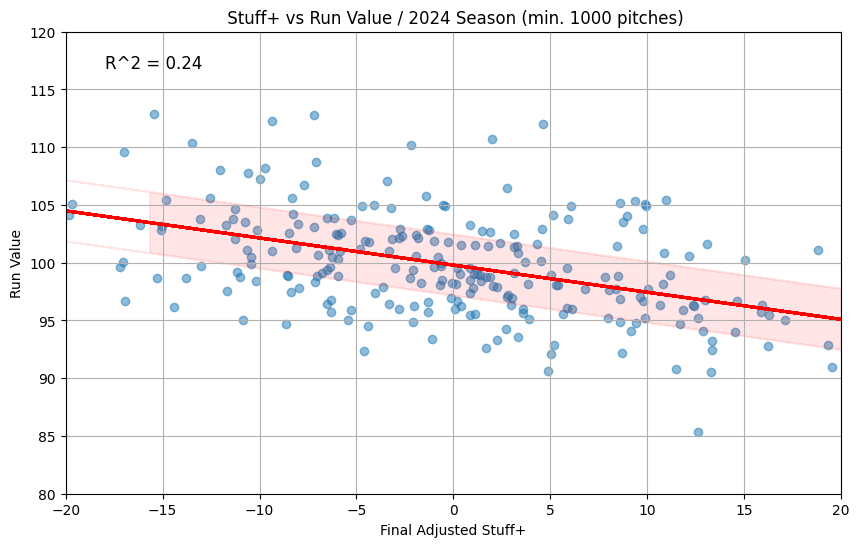

In [56]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
import matplotlib
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams
import matplotlib.dates as mdates
y = df_2023_total_pitcher_RV_count_500['Final_Adjusted_Stuff_Plus']
x = df_2023_total_pitcher_RV_count_500['RunValue']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title(' Stuff+ vs Run Value / 2024 Season (min. 1000 pitches)')
plt.xlabel('Final Adjusted Stuff+')
plt.ylabel('Run Value')
plt.grid()
plt.xlim(-20, 20)
plt.ylim(80, 120)
#add trendline with confidence interval
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='red', linewidth=2)
plt.fill_between(x, p(x) - 0.5 * np.std(y), p(x) + 0.5 * np.std(y), color='red', alpha=0.1)
#annotato r^2
r2 = r2_score(y, p(x))
plt.annotate(f'R^2 = {r2:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.show()





/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3254622839.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zk/xz_77pl12bx126zpb7kszl180000gn/T/ipykernel_57692/3254622839.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                            OLS Regression Results                            
Dep. Variable:                     K%   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     78.22
Date:                Fri, 09 May 2025   Prob (F-statistic):           1.49e-16
Time:                        12:29:02   Log-Likelihood:                -747.19
No. Observations:                 260   AIC:                             1498.
Df Residuals:                     258   BIC:                             1506.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

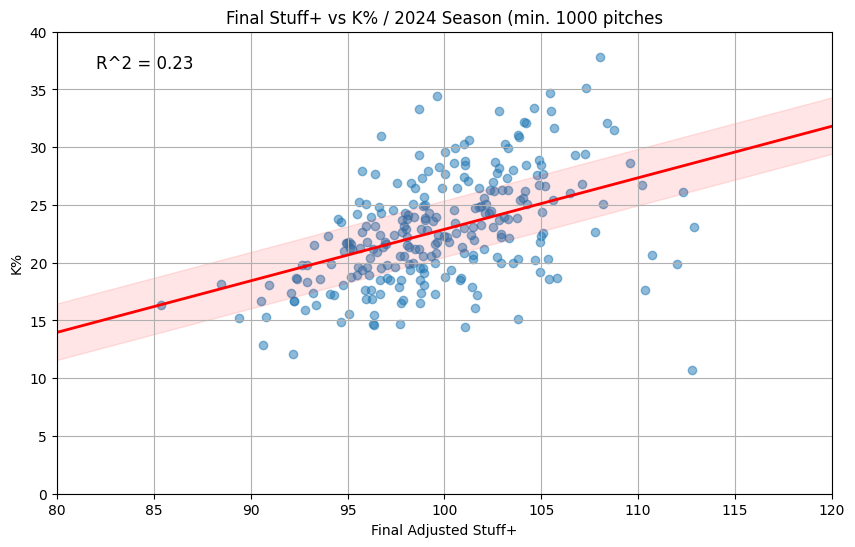

In [59]:
# Ensure 'K%' column is a string
df_2023_total_pitcher_RV_count_500['K%'] = df_2023_total_pitcher_RV_count_500['K%'].astype(str)
df_2023_total_pitcher_RV_count_500['K%'] = (
    df_2023_total_pitcher_RV_count_500['K%']
    .str.rstrip('%')
    .replace('', '0') 
    .astype(float)
)
df_2023_total_pitcher_RV_count100 = df_2023_total_pitcher_RV_count_500.dropna(subset=['K%', 'Final_Adjusted_Stuff_Plus'])
x = df_2023_total_pitcher_RV_count100['Final_Adjusted_Stuff_Plus']
y = df_2023_total_pitcher_RV_count100['K%']
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())

import matplotlib.pyplot as plt
import numpy as np
x = df_2023_total_pitcher_RV_count100['Final_Adjusted_Stuff_Plus']
y = df_2023_total_pitcher_RV_count100['K%']
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Final Stuff+ vs K% / 2024 Season (min. 1000 pitches')
plt.xlabel('Final Adjusted Stuff+')
plt.ylabel('K%')
plt.grid()
plt.xlim(80, 120)
plt.ylim(0, 40)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='red', linewidth=2)
plt.fill_between(x, p(x) - 0.5 * np.std(y), p(x) + 0.5 * np.std(y), color='red', alpha=0.1)
#annotate r^2
r2 = r2_score(y, p(x))
plt.annotate(f'R^2 = {r2:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top')
plt.show()

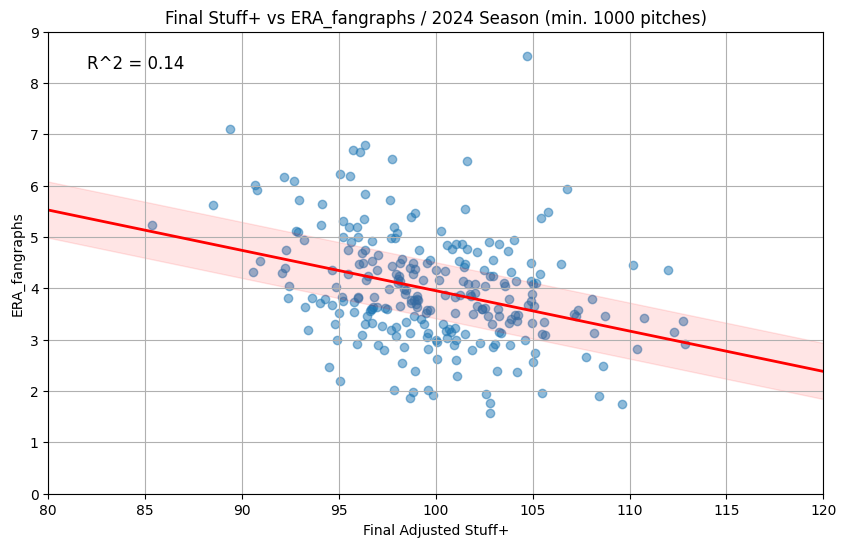

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

df_2023_total_pitcher_RV_count100['Final_Adjusted_Stuff_Plus'] = pd.to_numeric(df_2023_total_pitcher_RV_count100['Final_Adjusted_Stuff_Plus'], errors='coerce')
df_2023_total_pitcher_RV_count100['ERA_fangraphs'] = pd.to_numeric(df_2023_total_pitcher_RV_count100['ERA_fangraphs'], errors='coerce')
df_clean = df_2023_total_pitcher_RV_count100.dropna(subset=['Final_Adjusted_Stuff_Plus', 'ERA_fangraphs'])
x = df_clean['Final_Adjusted_Stuff_Plus']
y = df_clean['ERA_fangraphs']

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Final Stuff+ vs ERA_fangraphs / 2024 Season (min. 1000 pitches)')
plt.xlabel('Final Adjusted Stuff+')
plt.ylabel('ERA_fangraphs')
plt.grid()
plt.xlim(80, 120)
plt.ylim(0, 9)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), color='red', linewidth=2)
plt.fill_between(x, p(x) - 0.5 * np.std(y), p(x) + 0.5 * np.std(y), color='red', alpha=0.1)
r2 = r2_score(y, p(x))
plt.annotate(f'R^2 = {r2:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top')

plt.show()
